# 1.)Classwork

##      (a) Importing Data 

In [1]:
pwd

'C:\\Users\\Eisha Goel\\Desktop\\Machine Learning'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn

In [3]:
df = pd.read_csv("C:/Users/Eisha Goel/Desktop/Machine Learning/House_Price.csv",header=0)

In [4]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [5]:
df.shape

(506, 19)

## (b) Univariate Analysis and EDD 

In [6]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


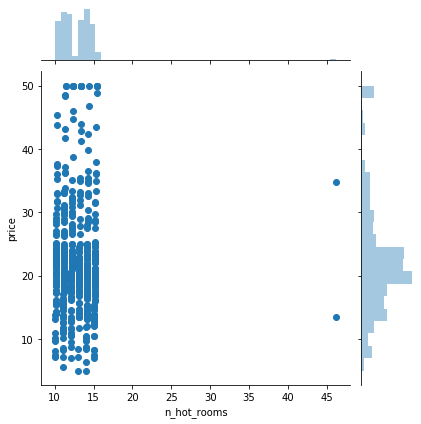

In [22]:
sns.jointplot(x='n_hot_rooms',y='price',data=df)

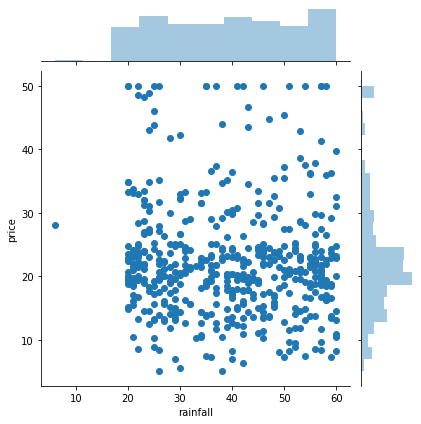

In [28]:
sns.jointplot(x='rainfall',y='price',data=df)

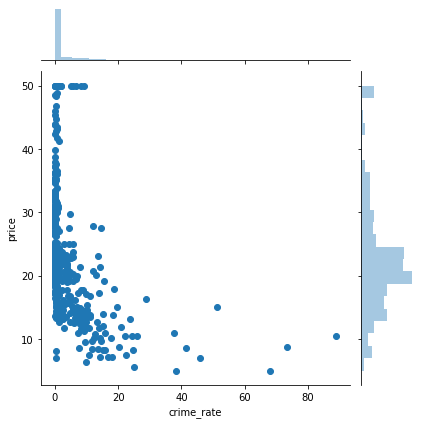

In [11]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [ ]:
df.head()

In [ ]:
sns.countplot(x='airport',data=df)

In [ ]:
sns.countplot(x='waterbody',data=df)

In [ ]:
sns.countplot(x='bus_ter',data=df)

## (c) Outlier Treatment 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [15]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [16]:
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [17]:
uv=np.percentile(df.n_hot_rooms,[99])[0]

In [21]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [19]:
df.n_hot_rooms[(df.n_hot_rooms>3*uv)]=3*uv

c:\users\eisha goel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
np.percentile(df.rainfall,[1])[0]

20.0

In [24]:
lv=np.percentile(df.rainfall,[1])[0]

In [27]:
df[(df.rainfall<lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


In [26]:
df.rainfall[(df.rainfall<0.3*lv)]=0.3*lv

c:\users\eisha goel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [ ]:
df.describe()

## (d) Missing Value Imputation

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [ ]:
df.n_hos_beds=df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [ ]:
df.info()

## (e) Variable Transformation and Deletion

In [ ]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [ ]:
df.crime_rate=np.log(1+df.crime_rate)

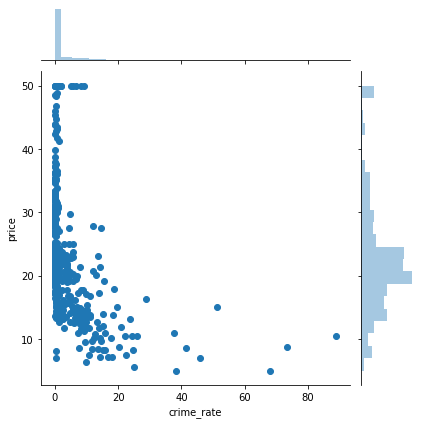

In [12]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [ ]:
df['avg_dist']=(df.dist1+df.dist2+df.dist3+df.dist4)/4

In [ ]:
df.describe()

In [ ]:
del df['dist1']

In [ ]:
del df['dist2']

In [ ]:
del df['dist3']

In [ ]:
del df['dist4']

In [ ]:
df.describe()

In [ ]:
del df['bus_ter']

In [ ]:
df.head()

## (f) Dummy Variable Creation

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
del df['airport_NO']

In [ ]:
del df['waterbody_None']

In [ ]:
df.head()

## (g) Correlation Analysis

In [ ]:
df.corr()

In [ ]:
del df['parks']

In [ ]:
df.head()

## (h) Simple Linear Regression

In [ ]:
X=sn.add_constant(df['room_num'])

In [ ]:
lm=sn.OLS(df['price'],X).fit()

In [ ]:
lm.summary()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Y=df['price']

In [ ]:
X=df[['room_num']]

In [ ]:
lm2=LinearRegression()

In [ ]:
lm2.fit(X,Y)

In [ ]:
print(lm2.intercept_, lm2.coef_)

In [ ]:
lm2.predict(X)

In [ ]:
help(sns.jointplot)

In [ ]:
sns.jointplot(x=df['room_num'], y=df['price'], data=df, kind='reg', color='red', height=25)

## (i) Multiple Linear Regression

In [ ]:
x_multi=df.drop("price",axis=1)

In [ ]:
x_multi.head()

In [ ]:
y_multi=df['price']

In [ ]:
y_multi.head()

In [ ]:
x_multi_cons = sn.add_constant(x_multi)

In [ ]:
x_multi_cons.head()

In [ ]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [ ]:
lm_multi.summary()

In [ ]:
lm3_multi=LinearRegression()

In [ ]:
lm3_multi.fit(x_multi,y_multi)

In [ ]:
print(lm3_multi.intercept_,lm3_multi.coef_)

## (j) Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
lm_a=LinearRegression()

In [ ]:
lm_a.fit(x_train,y_train)

In [ ]:
y_test_a=lm_a.predict(x_test)

In [ ]:
y_train_a=lm_a.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_test_a)

In [ ]:
r2_score(y_train,y_train_a)

## (k) Ridge and Lasso Regression 

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
x_train_s = scaler.transform(x_train)

In [ ]:
x_test_s = scaler.transform(x_test)

### (1.) Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
lm_r = Ridge(alpha=0.5)

In [ ]:
lm_r.fit(x_train_s,y_train)

In [ ]:
r2_score(y_test,lm_r.predict(x_test_s))

In [ ]:
r2_score(y_train,lm_r.predict(x_train_s))

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
validation_curve?

In [ ]:
param_range = np.logspace(-2,8,100)

In [ ]:
param_range

In [ ]:
train_scores,test_scores = validation_curve(Ridge(),x_train_s,y_train,"alpha",param_range,scoring='r2')

In [ ]:
print(train_scores)
print(test_scores)

In [ ]:
train_mean = np.mean(train_scores,axis=1)

In [ ]:
test_mean = np.mean(test_scores,axis=1)

In [ ]:
train_mean

In [ ]:
test_mean

In [ ]:
max(test_mean)

In [ ]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [ ]:
np.where(test_mean==max(test_mean))

In [ ]:
param_range[31]

In [ ]:
lm_r_best=Ridge(alpha=param_range[31])

In [ ]:
lm_r_best.fit(x_train_s,y_train)

In [ ]:
r2_score(y_test,lm_r_best.predict(x_test_s))

In [ ]:
r2_score(y_train,lm_r_best.predict(x_train_s))

### (2.) Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lm_l = Lasso(alpha=0.4)

In [ ]:
lm_l.fit(x_train_s,y_train)

In [ ]:
r2_score(y_test,lm_l.predict(x_test_s))

In [ ]:
r2_score(y_train,lm_l.predict(x_train_s))

In [ ]:
parameter_range=np.logspace(-2,8,100)

In [ ]:
train_scores_l,test_scores_l = validation_curve(Lasso(),x_train_s,y_train,"alpha",parameter_range,scoring='r2')

In [ ]:
print(train_scores_l)
print(test_scores_l)

In [ ]:
train_mean_l = np.mean(train_scores_l,axis=1)

In [ ]:
test_mean_l = np.mean(test_scores_l,axis=1)

In [ ]:
train_mean_l

In [ ]:
test_mean_l

In [ ]:
max(test_mean_l)

In [ ]:
sns.jointplot(x=np.log(parameter_range),y=test_mean_l)

In [ ]:
np.where(test_mean_l==max(test_mean_l))

In [ ]:
parameter_range[7]

In [ ]:
lm_l_best=Lasso(alpha=parameter_range[7])

In [ ]:
lm_l_best.fit(x_train_s,y_train)

In [ ]:
r2_score(y_test,lm_l_best.predict(x_test_s))

In [ ]:
r2_score(y_train,lm_l_best.predict(x_train_s))

# 2.)Homework

## (a) Importing Data

In [ ]:
mv = pd.read_csv("C:/Users/Eisha Goel/Desktop/Machine Learning/Movies.csv",header=0)

In [ ]:
mv.head()

In [ ]:
mv.shape

## (b) Univariate Analysis and EDD

In [ ]:
mv.describe()

In [ ]:
sns.jointplot(x='Time_taken',y='Collection',data=mv)

In [ ]:
sns.jointplot(x='Marketin_expense',y='Collection',data=mv)

In [ ]:
sns.jointplot(x='Twitter_hastags',y='Collection',data=mv)

In [ ]:
sns.jointplot(x='Avg_age_actors',y='Collection',data=mv)

In [ ]:
mv.head()

In [ ]:
sns.countplot(x='Genre',data=mv)

In [ ]:
sns.countplot(x='MPAA_film_rating',data=mv)

In [ ]:
sns.countplot(x='3D_available',data=mv)

## (c)Outlier Treatment

In [ ]:
mv.info()

In [ ]:
np.percentile(mv.Marketin_expense,[99])[0]

In [ ]:
upp_val=np.percentile(mv.Marketin_expense,[99])[0]

In [ ]:
mv[(mv.Marketin_expense>upp_val)]

In [ ]:
mv.Marketin_expense[(mv.Marketin_expense>3*upp_val)]=3*upp_val

In [ ]:
np.percentile(mv.Twitter_hastags,[99])[0]

In [ ]:
UppVal=np.percentile(mv.Twitter_hastags,[99])[0]

In [ ]:
mv[(mv.Twitter_hastags>UppVal)]

In [ ]:
mv.Twitter_hastags[(mv.Twitter_hastags>3*UppVal)]=3*UppVal

In [ ]:
np.percentile(mv.Avg_age_actors,[1])[0]

In [ ]:
low_val=np.percentile(mv.Avg_age_actors,[1])[0]

In [ ]:
mv[(mv.Avg_age_actors<low_val)]

In [ ]:
mv.Avg_age_actors[(mv.Avg_age_actors<0.3*low_val)]=0.3*low_val

In [ ]:
mv.describe()

## (d) Missing Value Imputation

In [ ]:
mv.info()

In [ ]:
mv.Time_taken=mv.Time_taken.fillna(mv.Time_taken.mean())

In [ ]:
mv.info()

## (e) Variable Transformation and Deletion

In [ ]:
sns.jointplot(x='Trailer_views',y='Collection',data=mv)

In [ ]:
mv.Trailer_views=(mv.Trailer_views*mv.Trailer_views)

In [ ]:
sns.jointplot(x='Trailer_views',y='Collection',data=mv)

In [ ]:
mv['Avg_rating']=(mv.Lead_Actress_rating + mv.Director_rating + mv.Producer_rating + mv.Critic_rating)/4

In [ ]:
del mv['Lead_Actress_rating']

In [ ]:
del mv['Director_rating']

In [ ]:
del mv['Producer_rating']

In [ ]:
del mv['Critic_rating']

In [ ]:
mv.describe()

In [ ]:
mv.head()

In [ ]:
del mv['MPAA_film_rating']

In [ ]:
mv.head()

## (f) Dummy Variable Creation

In [ ]:
mv=pd.get_dummies(mv)

In [ ]:
mv.head()

In [ ]:
del mv['Genre_Thriller']

In [ ]:
del mv['3D_available_NO']

In [ ]:
mv.head()

## (g) Correlation Analysis

In [ ]:
mv.corr()

In [ ]:
del mv['Num_multiplex']

In [ ]:
mv.head()

## (h) Simple Linear Regression 

In [ ]:
X=sn.add_constant(mv['Budget'])

In [ ]:
lm=sn.OLS(mv['Collection'],X).fit()

In [ ]:
lm.summary()

In [ ]:
Y=mv['Collection']

In [ ]:
X=mv[['Budget']]

In [ ]:
lm3=LinearRegression()

In [ ]:
lm3.fit(X,Y)

In [ ]:
print(lm3.intercept_, lm3.coef_)

In [ ]:
lm3.predict(X)

In [ ]:
sns.jointplot(x=mv['Budget'],y=mv['Collection'],data=mv,kind='reg',color='blue',height=25)

## (i) Multiple Linear Regression

In [ ]:
xMulti=mv.drop("Collection",axis=1)

In [ ]:
xMulti.head()

In [ ]:
xMultiCons=sn.add_constant(xMulti)

In [ ]:
xMultiCons.head()

In [ ]:
yMulti=mv['Collection']

In [ ]:
yMulti.head()

In [ ]:
lmMulti=sn.OLS(yMulti,xMultiCons).fit()

In [ ]:
lmMulti.summary()

In [ ]:
lm3Multi=LinearRegression()

In [ ]:
lm3Multi.fit(xMulti,yMulti)

In [ ]:
print(lm3Multi.intercept_,lm3Multi.coef_)

## (j) Test-Train Split

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(xMulti,yMulti,test_size=0.2,random_state=0)

In [ ]:
print(xTrain.shape,xTest.shape,yTrain.shape,yTest.shape)

In [ ]:
lmA=LinearRegression()

In [ ]:
lmA.fit(xTrain,yTrain)

In [ ]:
yTestA=lmA.predict(xTest)

In [ ]:
yTrainA=lmA.predict(xTrain)

In [ ]:
r2_score(yTest,yTestA)

In [ ]:
r2_score(yTrain,yTrainA)

## (k) Ridge and Lasso Regression

In [ ]:
Scaler = preprocessing.StandardScaler().fit(xTrain)

In [ ]:
xTrainS=Scaler.transform(xTrain)

In [ ]:
xTestS=Scaler.transform(xTest)

### (1.) Ridge Regression

In [ ]:
lmR=Ridge(alpha=0.5)

In [ ]:
lmR.fit(xTrainS,yTrain)

In [ ]:
r2_score(yTest,lmR.predict(xTestS))

In [ ]:
r2_score(yTrain,lmR.predict(xTrainS))

In [ ]:
parameterRange = np.logspace(-2,8,100)

In [ ]:
parameterRange

In [ ]:
validation_curve?

In [ ]:
trainScore,testScore=validation_curve(Ridge(),xTrainS,yTrain,"alpha",parameterRange,scoring='r2')

In [ ]:
print(trainScore)
print(testScore)

In [ ]:
trainMean = np.mean(trainScore,axis=1)

In [ ]:
testMean = np.mean(testScore,axis=1)

In [ ]:
trainMean

In [ ]:
testMean

In [ ]:
max(testMean)

In [ ]:
sns.jointplot(x=np.log(parameterRange),y=testMean)

In [ ]:
np.where(testMean==max(testMean))

In [ ]:
parameterRange[32]

In [ ]:
lmR_best = Ridge(alpha=parameterRange[32])

In [ ]:
lmR_best.fit(xTrainS,yTrain)

In [ ]:
r2_score(yTest,lmR_best.predict(xTestS))

In [ ]:
r2_score(yTrain,lmR_best.predict(xTrainS))

### (2.) Lasso Regression

In [ ]:
lmL=Lasso(alpha=0.5)

In [ ]:
lmL.fit(xTrainS,yTrain)

In [ ]:
r2_score(yTest,lmL.predict(xTestS))

In [ ]:
r2_score(yTrain,lmL.predict(xTrainS))

In [ ]:
parameter_Range = np.logspace(-2,8,100)

In [ ]:
parameter_Range

In [ ]:
validation_curve?

In [ ]:
trainScoreL,testScoreL = validation_curve(Lasso(),xTrainS,yTrain,'alpha',parameter_range,scoring='r2')

In [ ]:
print(trainScoreL)
print(testScoreL)

In [ ]:
trainMeanL = np.mean(trainScoreL,axis=1)

In [ ]:
testMeanL = np.mean(testScoreL,axis=1)

In [ ]:
trainMeanL

In [ ]:
testMeanL

In [ ]:
max(testMeanL)

In [ ]:
sns.jointplot(x=np.log(parameter_Range),y=testMeanL)

In [ ]:
np.where(testMeanL==max(testMeanL))

In [ ]:
parameter_Range[33]

In [ ]:
lmL_best =  Lasso(alpha=parameter_Range[33])

In [ ]:
lmL_best.fit(xTrainS,yTrain)

In [ ]:
r2_score(yTest,lmL_best.predict(xTestS))

In [ ]:
r2_score(yTrain,lmL_best.predict(xTrainS))